In [3]:
import numpy as np
import pandas as pd

import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GroupKFold

from scipy import stats
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

import statsmodels
from sklearn.compose import ColumnTransformer
import statsmodels.api as sm
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt 
import seaborn as sns
from pandas import Timestamp

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR

import xgboost as xgb
from xgboost import XGBRegressor 
from xgboost.sklearn import XGBClassifier # sklearn’s Grid Search with parallel processing
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from catboost import CatBoostRegressor

# import warnings
# warnings.filterwarnings('ignore')

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [4]:
data = pd.read_csv('DF_File_sample.csv')
data['SKU_Customer'] = data['DemandCustomer'] + '_' + data['SKU10']
data_labels = data['SKU_Customer'] 
data.drop(['DemandCustomer', 'SKU10'], axis =1, inplace = True)

### Featcher engineering:

#### Add avg by SKU_Customer and sales:

In [107]:
data.head()

,Brand,Year,Quarter,Month_No,Week_No,Sales,W_Nielsen,SKU_Customer
0,ARW,2015,1,1,1,205.0,0.0,ALL OTHERS - US_62338-91101
1,ARW,2015,1,1,2,2202.0,0.0,ALL OTHERS - US_62338-91101
2,ARW,2015,1,1,3,2527.0,0.0,ALL OTHERS - US_62338-91101
3,ARW,2015,1,1,4,680.0,0.0,ALL OTHERS - US_62338-91101
4,ARW,2015,1,2,5,1149.0,0.0,ALL OTHERS - US_62338-91101


In [5]:
# First variant

# and by month 
data['SKU_Customer_month_Week_No'] = data.groupby(['SKU_Customer', 'Month_No', 'Week_No']).Sales.transform('mean')
data['Brand_month_Week_No'] = data.groupby(['Brand', 'Month_No', 'Week_No']).Sales.transform('mean')
data['Brand_SKU_Customer_Week_No'] = data.groupby(['Brand', 'SKU_Customer', 'Week_No']).Sales.transform('mean')
data['Brand_SKU_Customer_month_Week_No'] = data.groupby(['Brand', 'SKU_Customer', 'Month_No', 'Week_No']).Sales.transform('mean')

data['Agg_mean'] = data.groupby(['Month_No']).Sales.transform('mean')
data['Agg_median'] = data.groupby(['Month_No']).Sales.transform('median')
data['Agg_mode'] = data.groupby(['Month_No']).Sales.transform(lambda x: x.mode().idxmax())

data['Bin_mean'] = np.where(data['Sales'] > data['Agg_mean'], 1, 0)
data['Bin_median'] = np.where(data['Sales'] > data['Agg_median'], 1, 0)
data['Bin_mode'] = np.where(data['Sales'] > data['Agg_mode'], 1, 0)


# and by weeks
data['SKU_Customer_month'] = data.groupby(['SKU_Customer', 'Month_No']).Sales.transform('mean')
data['Brand_month'] = data.groupby(['Brand', 'Month_No']).Sales.transform('mean')
data['Brand_SKU_Customer_month'] = data.groupby(['Brand', 'SKU_Customer', 'Month_No']).Sales.transform('mean')

In [167]:
# Second variant

# and by Quarter
data['SKU_Customer_Quarter'] = data.groupby(['SKU_Customer', 'Quarter']).Sales.transform('mean')
data['Brand_Quarter'] = data.groupby(['Brand', 'Quarter']).Sales.transform('mean')
data['Brand_SKU_Customer'] = data.groupby(['Brand', 'SKU_Customer']).Sales.transform('mean')
data['Brand_SKU_Customer_Quarter'] = data.groupby(['Brand', 'SKU_Customer', 'Quarter']).Sales.transform('mean')

data['Agg_mean_Quarter'] = data.groupby(['Quarter']).Sales.transform('mean')
data['Agg_median_Quarter'] = data.groupby(['Quarter']).Sales.transform('median')
data['Agg_mode_Quarter'] = data.groupby(['Quarter']).Sales.transform(lambda x: x.mode().idxmax())

data['Bin_mean_Quarter'] = np.where(data['Sales'] > data['Agg_mean_Quarter'], 1, 0)
data['Bin_median_Quarter'] = np.where(data['Sales'] > data['Agg_median_Quarter'], 1, 0)
data['Bin_mode_Quarter'] = np.where(data['Sales'] > data['Agg_mode_Quarter'], 1, 0)


# and by month 
data['SKU_Customer_month_Week_No'] = data.groupby(['SKU_Customer', 'Month_No', 'Week_No']).Sales.transform('mean')
data['Brand_month_Week_No'] = data.groupby(['Brand', 'Month_No', 'Week_No']).Sales.transform('mean')
data['Brand_SKU_Customer_Week_No'] = data.groupby(['Brand', 'SKU_Customer', 'Week_No']).Sales.transform('mean')
data['Brand_SKU_Customer_month_Week_No'] = data.groupby(['Brand', 'SKU_Customer', 'Month_No', 'Week_No']).Sales.transform('mean')

data['Agg_mean'] = data.groupby(['Month_No']).Sales.transform('mean')
data['Agg_median'] = data.groupby(['Month_No']).Sales.transform('median')
data['Agg_mode'] = data.groupby(['Month_No']).Sales.transform(lambda x: x.mode().idxmax())

data['Bin_mean'] = np.where(data['Sales'] > data['Agg_mean'], 1, 0)
data['Bin_median'] = np.where(data['Sales'] > data['Agg_median'], 1, 0)
data['Bin_mode'] = np.where(data['Sales'] > data['Agg_mode'], 1, 0)


# and by weeks
data['SKU_Customer_month'] = data.groupby(['SKU_Customer', 'Month_No']).Sales.transform('mean')
data['Brand_month'] = data.groupby(['Brand', 'Month_No']).Sales.transform('mean')
data['Brand_SKU_Customer_month'] = data.groupby(['Brand', 'SKU_Customer', 'Month_No']).Sales.transform('mean')

In [6]:
# delete aff columns
data.drop([i for i in data.columns if 'Agg' in i], axis = 1, inplace = True)

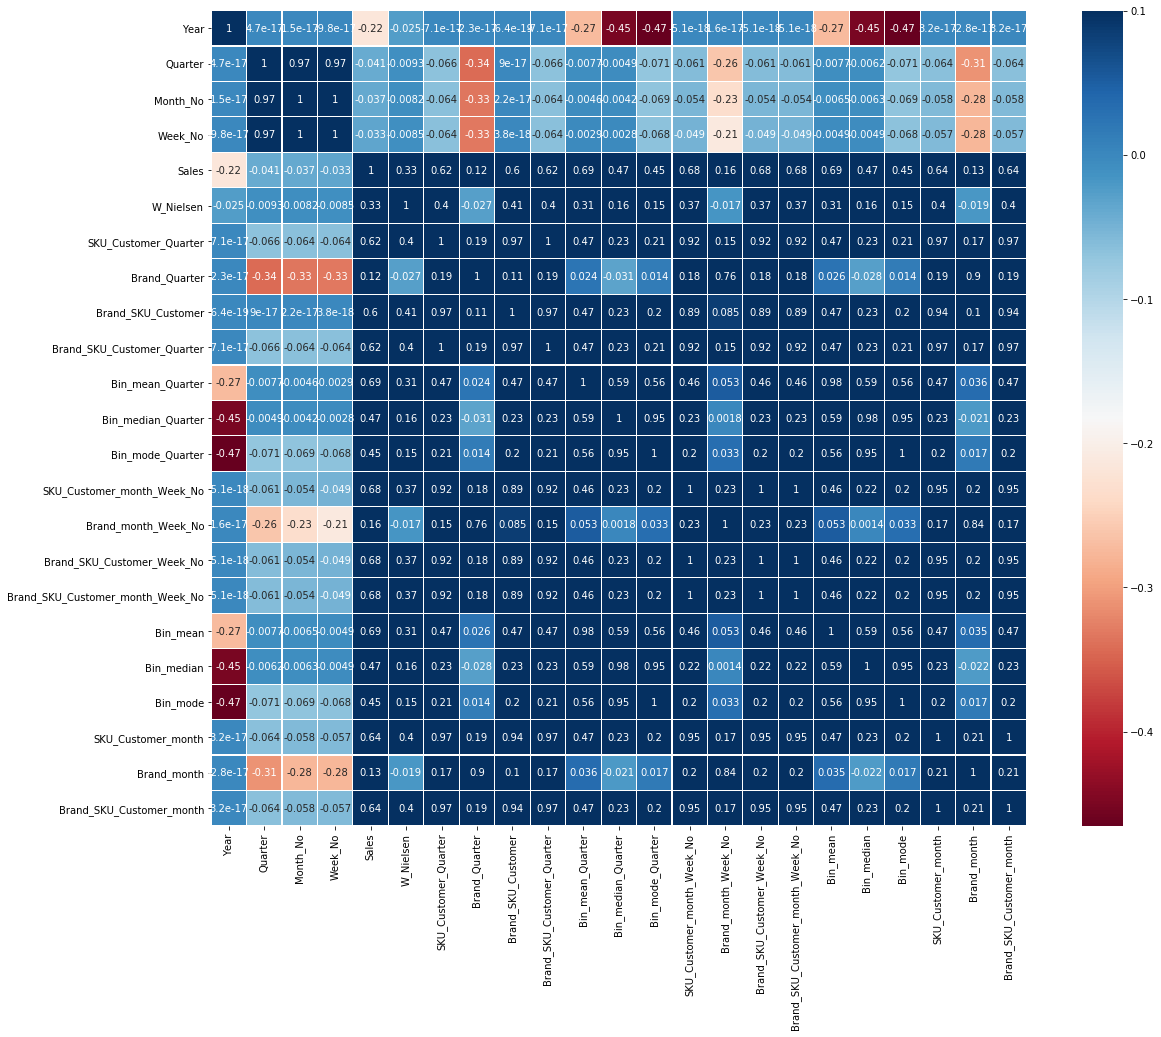

In [110]:
columnn_to_choose = data.columns
colormap = plt.cm.RdBu
corrmat = data[columnn_to_choose].corr()
plt.subplots(figsize = (20, 15))
sns.heatmap(corrmat, linewidth=.1, vmax=.1, 
            square=True, cmap=colormap, linecolor='white', annot=True)


In [76]:
data.columns

Index(['Brand', 'Year', 'Quarter', 'Month_No', 'Week_No', 'Sales', 'W_Nielsen',
       'SKU_Customer', 'SKU_Customer_Quarter', 'Brand_Quarter',
       'Brand_SKU_Customer', 'Brand_SKU_Customer_Quarter', 'Bin_mean_Quarter',
       'Bin_median_Quarter', 'Bin_mode_Quarter', 'SKU_Customer_month_Week_No',
       'Brand_month_Week_No', 'Brand_SKU_Customer_Week_No',
       'Brand_SKU_Customer_month_Week_No', 'Bin_mean', 'Bin_median',
       'Bin_mode', 'SKU_Customer_month', 'Brand_month',
       'Brand_SKU_Customer_month'],
      dtype='object')

### Categorical:

In [165]:
for c in cat_var:
    data.iloc[:, c] = pd.Categorical(data.iloc[:,c])

### One Hot Encoder:

In [7]:
data_OH = pd.get_dummies(data)

In [8]:
data = data_OH.copy()

## Data cleaning:

#### agg sales by month

In [9]:
data['year_week'] = data['Year'].astype(str) + '-' + data['Week_No'].astype(str)
data['pre_date'] = data['year_week'].apply(lambda x: datetime.datetime.strptime(x + '-4',  "%G-%V-%w"))

In [10]:
first_null = data.groupby('pre_date').Sales.sum().loc[lambda x: x == 0].sort_values().index[0]
data = data[data.pre_date < first_null]

In [11]:
first_26_week = pd.Series(sorted(data['pre_date'].unique())).iloc[-26]

In [12]:
first_34_week = pd.Series(sorted(data['pre_date'].unique())).iloc[-34]

In [13]:
train = data[data['pre_date'] < first_34_week]
test = data[data['pre_date'] >= first_26_week]
data.drop(['pre_date', 'year_week'], axis =1, inplace = True)
train.drop(['pre_date', 'year_week'], axis =1, inplace = True)
test.drop(['pre_date', 'year_week'], axis =1, inplace = True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
test0 = test.copy()
test0['SKU_Customer'] = test0.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
test['Sales'] = test0.groupby(['SKU_Customer', 'Year', 'Month_No']).Sales.transform('sum')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [212]:
# for LE
test0 = test.copy()
test['Sales'] = test0.groupby(['SKU_Customer', 'Year', 'Month_No']).Sales.transform('sum')

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
X_train = train.loc[:, train.columns!='Sales']
X_test = test.loc[:, test.columns!='Sales']
y_train = train['Sales']
y_test = test['Sales']

## Label Encoding:

In [214]:
cat_var = [X_train.columns.get_loc(c) for c in X_train.columns if X_train.loc[:, c].dtypes=='object']

In [215]:
le = preprocessing.LabelEncoder()

for i in cat_var:
    X_train.iloc[:, i] = le.fit_transform(X_train.iloc[:, i])
    X_test.iloc[:, i] = le.fit_transform(X_test.iloc[:, i])

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [86]:
X_train.dtypes

Year                                     int64
Quarter                                  int64
Month_No                                 int64
Week_No                                  int64
W_Nielsen                              float64
                                        ...   
SKU_Customer_WALMART US_19200-79329      uint8
SKU_Customer_WALMART US_51700-77050      uint8
SKU_Customer_WALMART US_62338-91101      uint8
SKU_Customer_WALMART US_62338-92944      uint8
SKU_Customer_WALMART US_62338-99058      uint8
Length: 73, dtype: object

In [16]:
def diff_scale(scaling_type = 'norm', X_train = X_train, X_test = X_test):
    norm_scaler = preprocessing.StandardScaler()
    min_max_scaler = preprocessing.MinMaxScaler() # [0, 1]
    max_abs_scaler = preprocessing.MaxAbsScaler() # [-1, 1]
    if scaling_type == 'norm':
        X_train_scaled = norm_scaler.fit_transform(X_train)
        X_test_scaled = norm_scaler.transform(X_test)
    elif scaling_type == 'min_max':
        X_train_scaled = min_max_scaler.fit_transform(X_train)
        X_test_scaled = min_max_scaler.transform(X_test)
    else: 
        X_train_scaled = max_abs_scaler.fit_transform(X_train)
        X_test_scaled = max_abs_scaler.transform(X_test) 
    return X_train_scaled, X_test_scaled

In [17]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)

### scale by column(for categorical variables):

In [18]:
def scale_by_col(df):
    for var in df.select_dtypes(['number']).columns:
        norm_scaler = preprocessing.StandardScaler()
        df[var] = norm_scaler.fit_transform(df[var].values.reshape(-1,1))
    return df

In [19]:
def scale_by_LE(df, cat_var_names):
    for var in df.columns.difference(cat_var_names):
        norm_scaler = preprocessing.StandardScaler()
        df[var] = norm_scaler.fit_transform(df[var].values.reshape(-1,1))
    return df

In [196]:
cat_var_names = ['Brand', 'SKU_Customer']

In [216]:
X_train_scaled = scale_by_LE(X_train, cat_var_names)
X_test_scaled = scale_by_LE(X_test, cat_var_names)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

### Eval func:

In [20]:
# Mape by every row
def mape(y, y_pred): 
    Data = {'y': np.array(y),
            'y_pred': np.array(y_pred)}
    Data['MAPE'] = np.where((Data['y_pred'] == 0)&(Data['y'] == 0), 0, \
                           np.where((Data['y_pred'] != 0)&(Data['y']==0),1, np.abs(Data['y_pred']-Data['y'])*100/Data['y']))
    
    return Data['MAPE'].mean()

In [21]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) * 100 / np.mean(np.abs(y_true))

In [22]:
def mape_by_month(y_true, y_pred): 
    test2 = test.copy()
    test2['Sales_pred'] = y_pred
    test2['SKU_Customer'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
    test2['Sales_pred'] = test2.groupby(['Year', 'Month_No', 'SKU_Customer']).Sales_pred.transform('mean')
    return mape(test['Sales'], test2['Sales_pred'])

In [23]:
def mape_by_month_LE(y_true, y_pred): 
    test2 = test.copy()
    test2['Sales_pred'] = y_pred
    test2['Sales_pred'] = test2.groupby(['Year', 'Month_No', 'SKU_Customer']).Sales_pred.transform('mean')
    return mape(test['Sales'], test2['Sales_pred'])

In [24]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [25]:
def rmse_by_month(y_true, y_pred): 
    test2 = test.copy()
    test2['Sales_pred'] = y_pred
    test2['SKU_Customer'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
    test2['Sales_pred'] = test2.groupby(['SKU_Customer', 'Year', 'Month_No']).Sales_pred.transform('mean')
    return rmse(test['Sales'], test2['Sales_pred'])

In [26]:
def MAD_by_month(y, y_pred):
    Data = {'y': np.array(y),
            'y_pred': np.array(y_pred)}
    
    test2 = test.copy()
    test2['y_pred'] = Data['y_pred']
    test2['SKU_Customer'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
    test2['y_pred'] = test2.groupby(['Year', 'Month_No', 'SKU_Customer']).y_pred.transform('mean')
    Data['y_pred'] = test2['y_pred']
    
    Data['MAD'] = np.where((Data['y_pred'] == 0)&(Data['y'] == 0), 0, \
                           np.where((Data['y_pred'] == 0)&(Data['y']!=0),1, np.abs(Data['y_pred']-Data['y'])/Data['y_pred']))
    return Data['MAD'].mean()

In [27]:
def MAD_by_month_LE(y, y_pred):
    Data = {'y': np.array(y),
            'y_pred': np.array(y_pred)}
    
    test2 = test.copy()
    test2['y_pred'] = Data['y_pred']
    test2['y_pred'] = test2.groupby(['Year', 'Month_No', 'SKU_Customer']).y_pred.transform('mean')
    Data['y_pred'] = test2['y_pred']
    
    Data['MAD'] = np.where((Data['y_pred'] == 0)&(Data['y'] == 0), 0, \
                           np.where((Data['y_pred'] == 0)&(Data['y']!=0),1, np.abs(Data['y_pred']-Data['y'])/Data['y_pred']))
    return Data['MAD'].mean()

# Modeling:

## Ridge: 

In [34]:
alphas = np.arange(0, 1, 0.01)
fit_interceptOptions = ([True, False])

model = Ridge() 
scorer = make_scorer(mape, greater_is_better=False)

ridge_cv = GridSearchCV(model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
ridge_cv.fit(X_train_scaled, y_train)

print("ridge mape:", mape_by_month(y_test, ridge_cv.predict(X_test_scaled)), ridge_cv.best_params_)
print("ridge rmse:", rmse_by_month(y_test, ridge_cv.predict(X_test_scaled)))
print("ridge MAD:", MAD_by_month(y_test, ridge_cv.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ridge mape: 78.26210458316488 {'alpha': 0.99, 'fit_intercept': True}
ridge rmse: 4449.260697701879
ridge MAD: 2.779961216820889


## Lasso:

In [204]:
alphas = np.arange(0, 1, 0.01)
fit_interceptOptions = ([True, False])

model = Lasso() 
scorer = make_scorer(mape, greater_is_better=False)

lasso_cv = GridSearchCV(model, param_grid=dict(alpha=alphas, fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
lasso_cv.fit(X_train_scaled, y_train)

print("lasso mape:", mape_by_month(y_test, lasso_cv.predict(X_test_scaled)), lasso_cv.best_params_)
print("lasso rmse:", rmse_by_month(y_test, lasso_cv.predict(X_test_scaled)))
print("lasso MAD:", MAD_by_month(y_test, lasso_cv.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


lasso mape: 43.844628487904465 {'alpha': 0.29, 'fit_intercept': True}
lasso rmse: 582.8834310653247
ridge rmse: 0.6283063149358187


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19725414.66720009, tolerance: 1416151.2387218715
  positive)


## ElasticNet:

In [205]:
alphas = np.logspace(-5,2,8)
l1_ratio = [.1, .15, .2, .25, .3,.4,.5,.6,.8]
fit_interceptOptions = ([True, False])

model = ElasticNet() 
scorer = make_scorer(mape, greater_is_better=False)

ElasticNet_cv = GridSearchCV(model, param_grid=dict(alpha=alphas, l1_ratio = l1_ratio, fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
ElasticNet_cv.fit(X_train_scaled, y_train)

print("ElasticNet mape:", mape_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)), ElasticNet_cv.best_params_)
print("ElasticNet rmse:", rmse_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)))
print("ElasticNet MAD:", MAD_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNet mape: 43.89520986906346 {'alpha': 0.01, 'fit_intercept': True, 'l1_ratio': 0.8}
ElasticNet rmse: 583.4014421480716
ElasticNet MAD: 0.6331462398547043


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14776034.158023834, tolerance: 1416151.2387218715
  positive)


In [187]:
alphas = [.009, .01, .015, .02,.05,.1]
l1_ratio = [.1,.2,.3,.4,.5,.55, .6, .65,.7,.8]
fit_interceptOptions = ([True, False])

model = ElasticNet() 
scorer = make_scorer(mape, greater_is_better=False)

ElasticNet_cv = GridSearchCV(model, param_grid=dict(alpha=alphas, l1_ratio = l1_ratio, fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
ElasticNet_cv.fit(X_train_scaled, y_train)

print("ElasticNet mape:", mape_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)), ElasticNet_cv.best_params_)
print("ElasticNet rmse:", rmse_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)))
print("ElasticNet MAD:", MAD_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ElasticNet mape: 43.88760884080415 {'alpha': 0.009, 'fit_intercept': True, 'l1_ratio': 0.8}
ElasticNet rmse: 583.3577674291163


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 596096359.1907067, tolerance: 1416151.2387218715
  positive)


#### Lasso takes the best result => tune diff scaling

### tune diff scaling:

##### min_max

In [260]:
X_train_scaled, X_test_scaled = diff_scale('min_max', X_train, X_test)
alphas = np.logspace(-5,2,8)
l1_ratio = [.1, .15, .2, .25, .3,.4,.5,.6,.8]

model = ElasticNet()  
scorer = make_scorer(mape, greater_is_better=False)

ElasticNet_cv_mm = GridSearchCV(model, param_grid=dict(alpha=alphas, l1_ratio=l1_ratio,fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
ElasticNet_cv_mm.fit(X_train_scaled, y_train)

print("Lasso mape:", mape_by_month(y_test, ElasticNet_cv_mm.predict(X_test_scaled)), ElasticNet_cv_mm.best_params_)
print("ElasticNet rmse:", rmse_by_month(y_test, ElasticNet_cv_mm.predict(X_test_scaled)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso mape: 50.17694271242768 {'alpha': 10.0, 'fit_intercept': False, 'l1_ratio': 0.8}
ElasticNet rmse: 351.0281888887466


##### max_abs

In [261]:
X_train_scaled, X_test_scaled = diff_scale('max_abs', X_train, X_test)
alphas = np.logspace(-5,2,8)
l1_ratio = [.1, .15, .2, .25, .3,.4,.5,.6,.8]

model = ElasticNet()  
scorer = make_scorer(mape, greater_is_better=False)

ElasticNet_cv_ma = GridSearchCV(model, param_grid=dict(alpha=alphas, l1_ratio=l1_ratio,fit_intercept=fit_interceptOptions), scoring = scorer, n_jobs=-2)
ElasticNet_cv_ma.fit(X_train_scaled, y_train)

print("Lasso mape:", mape_by_month(y_test, ElasticNet_cv_ma.predict(X_test_scaled)), ElasticNet_cv_mm.best_params_)
print("ElasticNet rmse:", rmse_by_month(y_test, ElasticNet_cv_ma.predict(X_test_scaled)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Lasso mape: 62.50765658487119 {'alpha': 10.0, 'fit_intercept': False, 'l1_ratio': 0.8}
ElasticNet rmse: 426.73585900075085


# SVR:

In [562]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
parameters = {'kernel': ('linear', 'rbf','poly'),
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}

model = SVR()
scorer = make_scorer(mape, greater_is_better=False)
svr = GridSearchCV(model, parameters, scoring = scorer, n_jobs=-2)
svr.fit(X_train_scaled, y_train)

print("SVR mape:", mape_by_month(y_test, svr.predict(X_test_scaled)), svr.best_params_)
print("SVR rmse:", rmse_by_month(y_test, svr.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR mape: 82.48684969248089 {'C': 1.5, 'epsilon': 0.3, 'gamma': 1e-07, 'kernel': 'linear'}
SVR rmse: 4638.55357824556


In [563]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
parameters = {'kernel': ['linear'],
              'C':[1, 2, 4, 5],
              'gamma': [1e-10, 1e-9, 1e-8, 1e-7],
              'epsilon':[.3, .35, .45, .5]}
 
model = SVR()
scorer = make_scorer(mape, greater_is_better=False)
svr = GridSearchCV(model, parameters, scoring = scorer, n_jobs=-2)
svr.fit(X_train_scaled, y_train)

print("SVR mape:", mape_by_month(y_test, svr.predict(X_test_scaled)), svr.best_params_)
print("SVR rmse:", rmse_by_month(y_test, svr.predict(X_test_scaled)))
print("SVR MAD:", MAD_by_month(y_test, ElasticNet_cv.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


SVR mape: 82.32578475959185 {'C': 2, 'epsilon': 0.45, 'gamma': 1e-10, 'kernel': 'linear'}
SVR rmse: 4630.3285453342405
SVR MAD: 2.81015437625592


## Lightgbm with k-Fold:

## 5

In [492]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
                                                  
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, n_jobs = -2)


gbm.fit(X_train_scaled, y_train)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


lightgbm mape: 82.13935749134242 {'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 160, 'num_leaves': 9}
lightgbm rmse: 4510.713280213905


## 7

In [518]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
                                                  
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   cv = 7,
                   n_jobs = -2)


gbm.fit(X_train_scaled, y_train)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 78.86952945136558 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 170, 'num_leaves': 8}
lightgbm rmse: 4422.83835990909


## 10

In [519]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
                                                  
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   cv = 10,
                   n_jobs = -2)


gbm.fit(X_train_scaled, y_train)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 78.81297203627314 {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 170, 'num_leaves': 8}
lightgbm rmse: 4422.940683731223


# Lightgbm with Group k-Fold:

In [30]:
groups = X_train['Year'].astype(str) + '_' + X_train['Week_No'].astype(str) 

In [505]:
groups = X_train[['Year', 'Week_No']].values

###  5

In [38]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm_g1 = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))


gbm_g1.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm_g1.predict(X_test_scaled)), gbm_g1.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm_g1.predict(X_test_scaled)))

lightgbm mape: 77.56147635770547 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 170, 'num_leaves': 9}
lightgbm rmse: 4368.990213180459


In [42]:
# use parametesr into models:
gbm_g1_result = lgb.LGBMRegressor(cat_features= cat_var, max_depth=7, n_estimators=170, learning_rate=0.2, num_leaves=9).fit(X_train_scaled, y_train)
print("XGB mape:", mape_by_month(y_test, gbm_g1_result.predict(X_test_scaled)))
print("XGB rmse:", rmse(y_test, gbm_g1_result.predict(X_test_scaled)))

XGB mape: 77.56147635770547
XGB rmse: 4368.990213180459


### 6

In [517]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=6))


gbm.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 78.59512841291054 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 170, 'num_leaves': 9}
lightgbm rmse: 4413.7326235717


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 8

In [534]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=8))


gbm.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 77.96815178417387 {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 170, 'num_leaves': 8}
lightgbm rmse: 4386.864356700242


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 12

In [535]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=12))


gbm.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 77.81430366609294 {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 170, 'num_leaves': 9}
lightgbm rmse: 4363.915162900023


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### 10

In [536]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=10))


gbm.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 78.07847265417618 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 170, 'num_leaves': 8}
lightgbm rmse: 4406.06631028755


#### tuning another parameters:

In [539]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : [170],
    'num_leaves': [9],
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [7],
    'learning_rate': [.2],
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)}

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))


gbm.fit(X_train_scaled, y_train, groups=groups)
print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 77.65397911725476 {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 170, 'num_leaves': 9, 'reg_alpha': 0.1, 'reg_lambda': 0.3833333333333333}
lightgbm rmse: 4364.7998910684055


In [554]:
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : [170],
    'num_leaves': [9],
    'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [7],
    'learning_rate': [.2],
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, .9, 10),
    'reg_lambda': np.linspace(0.1, 0.9, 10)}

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))


gbm.fit(X_train_scaled, y_train, groups=groups)
print("lightgbm mape:", mape_by_month(y_test, gbm.predict(X_test_scaled)), gbm.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm.predict(X_test_scaled)))

lightgbm mape: 77.83103272916486 {'learning_rate': 0.2, 'max_depth': 7, 'min_data_in_leaf': 10, 'n_estimators': 170, 'num_leaves': 9, 'reg_alpha': 0.7222222222222222, 'reg_lambda': 0.2777777777777778}
lightgbm rmse: 4349.254952177309


# XGB

In [523]:
param_grid = {
    'n_estimators' : list(range(150, 400, 50)),
    # 'num_leaves': list(range(8, 16, 4)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [8, 12, 15],
    'learning_rate': [.3, 0.1, 0.01]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
                          
scorer = make_scorer(mape, greater_is_better = False) 
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror')                        

    
grid_xgb = GridSearchCV(model_xgb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=10))

grid_xgb.fit(X_train_scaled, y_train, groups = groups)

print("XGB mape:", mape_by_month(y_test, grid_xgb.predict(X_test_scaled)), grid_xgb.best_params_)
print("XGB rmse:", rmse(y_test, grid_xgb.predict(X_test_scaled)))

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 450 out of 450 | elapsed:  8.0min finished
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGB mape: 77.30885861479051 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
XGB rmse: 4324.4381240720095


In [549]:
param_grid = {
    'n_estimators' : [200],
    'num_leaves': list(range(8, 17, 3)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [8, 9],
    'learning_rate': [.09, .1, 0.15]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
                          
scorer = make_scorer(mape, greater_is_better = False) 
model_xgb_1 = xgb.XGBRegressor(objective = 'reg:squarederror')                        

    
model_xgb_1 = GridSearchCV(model_xgb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=5))

grid_xgb_1.fit(X_train_scaled, y_train, groups = groups)

print("XGB mape:", mape_by_month(y_test, model_xgb_1.predict(X_test_scaled)), model_xgb_1.best_params_)
print("XGB rmse:", rmse(y_test, model_xgb_1.predict(X_test_scaled)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done  90 out of  90 | elapsed:   47.7s finished
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGB mape: 77.30885861479051 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 8}
XGB rmse: 4324.4381240720095


In [551]:
param_grid = {
    'n_estimators' : [200],
    'num_leaves': [8],
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [8, 9],
    'learning_rate': [.1],
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)}
                          
scorer = make_scorer(mape, greater_is_better = False) 
model_xgb_2 = xgb.XGBRegressor(objective = 'reg:squarederror')                        

    
model_xgb_2 = GridSearchCV(model_xgb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=5))

model_xgb_2.fit(X_train_scaled, y_train, groups = groups)

print("XGB mape:", mape_by_month(y_test, model_xgb_2.predict(X_test_scaled)), model_xgb_2.best_params_)
print("XGB rmse:", rmse(y_test, model_xgb_2.predict(X_test_scaled)))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-2)]: Done 626 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:  9.6min finished
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGB mape: 77.30885861479051 {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'num_leaves': 8, 'reg_alpha': 0.28888888888888886, 'reg_lambda': 0.5722222222222222}
XGB rmse: 4324.4381240720095


#### try to use simple CV:

In [40]:
param_grid = {
    'n_estimators' : [200],
    'num_leaves': [8],
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [8, 9],
    'learning_rate': [.1],
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    'reg_alpha': np.linspace(0.1, 0.95, 10),
    'reg_lambda': np.linspace(0.1, 0.95, 10)}
                          
scorer = make_scorer(mape, greater_is_better = False) 
model_xgb = xgb.XGBRegressor(objective = 'reg:squarederror')                        

    
grid_xgb_3 = GridSearchCV(model_xgb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = 5)

grid_xgb_3.fit(X_train_scaled, y_train)

print("XGB mape:", mape_by_month(y_test, grid_xgb_3.predict(X_test_scaled)), grid_xgb_3.best_params_)
print("XGB rmse:", rmse(y_test, grid_xgb_3.predict(X_test_scaled)))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-2)]: Done 140 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 343 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 626 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:  8.9min finished
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGB mape: 77.18610178943412 {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 8, 'reg_alpha': 0.8555555555555555, 'reg_lambda': 0.95}
XGB rmse: 4330.045389777716


In [41]:
# use parametesr into models:
grid_xgb_result = xgb.XGBRegressor(objective = 'reg:squarederror', max_depth=9, n_estimators=200, learning_rate=0.1, num_leaves=8, reg_alpha=0.8555555555555555, reg_lambda=0.95).fit(X_train_scaled, y_train)
print("XGB mape:", mape_by_month(y_test, grid_xgb_result.predict(X_test_scaled)))
print("XGB rmse:", rmse(y_test, grid_xgb_result.predict(X_test_scaled)))

XGB mape: 77.18610178943412
XGB rmse: 4330.045389777716


# CatBoost:

### One Hot..

In [213]:
param_grid = {'depth':[2, 5,10],
              'iterations':[100,500,1000],
              'learning_rate':[0.001,0.01,0.1,]} 
              #'l2_leaf_reg':[3,1,5,10,100],
              #'border_count':[32,5,10,20,50,100,200],
              #'ctr_border_count':[50,5,10,20,100,200],
              #'thread_count':4}
model_cb = CatBoostRegressor()
scorer = make_scorer(mape, greater_is_better = False)                       
    
grid_cb = GridSearchCV(model_cb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=5))
                                
grid_cb.fit(X_train_scaled, y_train, groups = groups)              

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed: 25.6min finished


0:	learn: 1347.3279484	total: 112ms	remaining: 1m 51s
1:	learn: 1274.1210607	total: 161ms	remaining: 1m 20s
2:	learn: 1213.5243446	total: 186ms	remaining: 1m 1s
3:	learn: 1155.4708507	total: 236ms	remaining: 58.7s
4:	learn: 1103.7345127	total: 360ms	remaining: 1m 11s
5:	learn: 1064.1289399	total: 396ms	remaining: 1m 5s
6:	learn: 1026.0816398	total: 513ms	remaining: 1m 12s
7:	learn: 991.4692484	total: 638ms	remaining: 1m 19s
8:	learn: 960.1622645	total: 761ms	remaining: 1m 23s
9:	learn: 937.3495531	total: 887ms	remaining: 1m 27s
10:	learn: 915.5697075	total: 1.01s	remaining: 1m 30s
11:	learn: 896.4533429	total: 1.12s	remaining: 1m 32s
12:	learn: 879.4267913	total: 1.24s	remaining: 1m 34s
13:	learn: 866.0112206	total: 1.35s	remaining: 1m 35s
14:	learn: 852.9204125	total: 1.48s	remaining: 1m 37s
15:	learn: 843.2625932	total: 1.61s	remaining: 1m 38s
16:	learn: 834.4756238	total: 1.73s	remaining: 1m 40s
17:	learn: 827.8824255	total: 1.86s	remaining: 1m 41s
18:	learn: 822.7001800	total: 1.89

GridSearchCV(cv=GroupKFold(n_splits=5), error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000018F08607E48>,
             iid='warn', n_jobs=-2,
             param_grid={'depth': [2, 5, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mape, greater_is_better=False), verbose=2)

In [214]:
print("CatBoost mape:", mape_by_month(y_test, grid_cb.predict(X_test_scaled)), grid_cb.best_params_)
print("CatBoost rmse:", rmse(y_test, grid_cb.predict(X_test_scaled)))

CatBoost mape: 77.90466221155232 {'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}
CatBoost rmse: 4338.744151048376


### With Cat var:

In [332]:
X_train_scaled_C, X_test_scaled_C = X_train_scaled, X_test_scaled

In [322]:
param_grid = {'depth':[2, 5,10],
              'iterations':[100,500,1000],
              'learning_rate':[0.001,0.01,0.1,]} 
              #'l2_leaf_reg':[3,1,5,10,100],
              #'border_count':[32,5,10,20,50,100,200],
              #'ctr_border_count':[50,5,10,20,100,200],
              #'thread_count':4}
                
model_cb = CatBoostRegressor()
scorer = make_scorer(mape, greater_is_better = False)                       
    
grid_cb2 = GridSearchCV(model_cb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=5))
                                
grid_cb2.fit(np.array(X_train_scaled_C), y_train, groups = groups, cat_features= [0, 6])

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  19 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-2)]: Done 135 out of 135 | elapsed: 878.9min finished


0:	learn: 1336.6833066	total: 143ms	remaining: 14.2s
1:	learn: 1249.2495017	total: 182ms	remaining: 8.92s
2:	learn: 1169.5845500	total: 273ms	remaining: 8.83s
3:	learn: 1099.4814763	total: 338ms	remaining: 8.12s
4:	learn: 1039.7186452	total: 411ms	remaining: 7.8s
5:	learn: 986.8568004	total: 475ms	remaining: 7.44s
6:	learn: 943.0680695	total: 553ms	remaining: 7.34s
7:	learn: 901.5165141	total: 624ms	remaining: 7.18s
8:	learn: 868.0768332	total: 704ms	remaining: 7.12s
9:	learn: 834.9095722	total: 790ms	remaining: 7.11s
10:	learn: 804.7286847	total: 880ms	remaining: 7.12s
11:	learn: 780.7683404	total: 953ms	remaining: 6.99s
12:	learn: 758.5986003	total: 1.02s	remaining: 6.86s
13:	learn: 739.9788469	total: 1.1s	remaining: 6.79s
14:	learn: 721.6573862	total: 1.19s	remaining: 6.75s
15:	learn: 705.1725261	total: 1.26s	remaining: 6.64s
16:	learn: 692.2485346	total: 1.35s	remaining: 6.57s
17:	learn: 684.0691143	total: 1.37s	remaining: 6.24s
18:	learn: 671.5536313	total: 1.44s	remaining: 6.16s


GridSearchCV(cv=GroupKFold(n_splits=5), error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostRegressor object at 0x0000018F0899E160>,
             iid='warn', n_jobs=-2,
             param_grid={'depth': [2, 5, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mape, greater_is_better=False), verbose=2)

In [331]:
print("CatBoost mape:", mape_by_month_LE(y_test, grid_cb2.predict(X_test_scaled_C)), grid_cb.best_params_)
print("CatBoost rmse:", rmse(y_test, grid_cb2.predict(X_test_scaled_C)))

CatBoost mape: 82.07746770187343 {'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}
CatBoost rmse: 4554.33382766506


### tuning another parameters:

In [ ]:
param_grid = {'depth':[2, 5,10],
              'iterations':[100,500,1000],
              'learning_rate':[0.001,0.01,0.1,]} 
              #'l2_leaf_reg':[3,1,5,10,100],
              #'border_count':[32,5,10,20,50,100,200],
              #'ctr_border_count':[50,5,10,20,100,200],
              #'thread_count':4}
                
model_cb = CatBoostRegressor()
scorer = make_scorer(mape, greater_is_better = False)                       
    
grid_cb2 = GridSearchCV(model_cb, 
                        param_grid, 
                        scoring = scorer,
                        n_jobs=-2,
                        verbose=2,
                        cv = GroupKFold(n_splits=5))
                                
grid_cb2.fit(X_train_scaled_C, y_train, groups = groups, cat_features=cat_var)

In [218]:
X_train_scaled

,Brand,Year,Quarter,Month_No,Week_No,W_Nielsen,SKU_Customer,SKU_Customer_month_Week_No,Brand_month_Week_No,Brand_SKU_Customer_Week_No,Brand_SKU_Customer_month_Week_No,Bin_mean,Bin_median,Bin_mode,SKU_Customer_month,Brand_month,Brand_SKU_Customer_month
0,0,-1.262361,-1.265143,-1.541062,-1.625597,-0.407639,2,-0.156012,-1.645016,-0.156012,-0.156012,-0.738758,0.66664,0.615374,0.443909,-0.768579,0.443909
1,0,-1.262361,-1.265143,-1.541062,-1.557834,-0.407639,2,0.548017,-0.317668,0.548017,0.548017,1.353624,0.66664,0.615374,0.443909,-0.768579,0.443909
2,0,-1.262361,-1.265143,-1.541062,-1.490071,-0.407639,2,0.698721,-0.691186,0.698721,0.698721,1.353624,0.66664,0.615374,0.443909,-0.768579,0.443909
3,0,-1.262361,-1.265143,-1.541062,-1.422308,-0.407639,2,0.591043,0.074554,0.591043,0.591043,1.353624,0.66664,0.615374,0.443909,-0.768579,0.443909
4,0,-1.262361,-1.265143,-1.246196,-1.354545,-0.407639,2,0.782545,-0.817606,0.782545,0.782545,1.353624,0.66664,0.615374,0.763108,-0.540984,0.763108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14943,2,1.559387,0.555896,0.228133,0.271765,-0.407639,43,5.625584,1.602458,5.625584,5.625584,1.353624,0.66664,0.615374,5.626842,1.479662,5.626842
14944,2,1.559387,0.555896,0.228133,0.339528,-0.407639,43,11.492341,3.991369,11.492341,11.492341,1.353624,0.66664,0.615374,5.626842,1.479662,5.626842
14945,2,1.559387,0.555896,0.522999,0.407291,-0.407639,43,0.591489,-0.650340,0.591489,0.591489,1.353624,0.66664,0.615374,1.386603,-0.375877,1.386603
14946,2,1.559387,0.555896,0.522999,0.475054,-0.407639,43,1.162203,-0.635458,1.162203,1.162203,-0.738758,0.66664,0.615374,1.386603,-0.375877,1.386603


## With new featchers

In [233]:
# result w/o new featcher - 77.56

# first variant
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm_n1 = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))


gbm_n1.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm_n1.predict(X_test_scaled)), gbm_n1.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm_n1.predict(X_test_scaled)))

lightgbm mape: 75.01791654819732 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110, 'num_leaves': 9}
lightgbm rmse: 4252.681096815268


In [179]:
# result w/o new featcher - 77.56

# secomd variant

X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
gbm_n1 = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))


gbm_n1.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, gbm_n1.predict(X_test_scaled)), gbm_n1.best_params_)
print("lightgbm rmse:", rmse(y_test, gbm_n1.predict(X_test_scaled)))

lightgbm mape: 74.8106147739727 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'num_leaves': 9}
lightgbm rmse: 4243.708199766807


## Random search:

In [256]:
# Grid first
X_train_scaled, X_test_scaled = diff_scale('norm', X_train, X_test)
param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)

    
scorer = make_scorer(mape, greater_is_better = False)   
lgb_grid = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))

lgb_grid.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, lgb_grid.predict(X_test_scaled)), lgb_grid.best_params_)
print("lightgbm rmse:", rmse(y_test, lgb_grid.predict(X_test_scaled)))

lightgbm mape: 75.01791654819732 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 110, 'num_leaves': 9}
lightgbm rmse: 4252.681096815268


In [257]:
# Random search
param_grid = {'n_estimators' : sp_randint(100, 180),
              'num_leaves': sp_randint(7, 10), 
              'max_depth': sp_randint(2, 8),
              'learning_rate': sp_uniform(loc=0.01, scale=0.3)}
              
              #'min_child_samples': sp_randint(100, 500), 
              #'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              #'subsample': sp_uniform(loc=0.2, scale=0.8), 
              #'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              #'reg_alpha': np.linspace(0.1, 0.95, 10),
              #'reg_lambda': np.linspace(0.1, 0.95, 10)}

scorer = make_scorer(mape, greater_is_better = False)  
n_HP_points_to_test = 100
lgb_random = RandomizedSearchCV(lgb.LGBMRegressor(cat_features = cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5),
                   n_iter=n_HP_points_to_test,
                   random_state=314,
                   verbose=True)

lgb_random.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, lgb_random.predict(X_test_scaled)), lgb_random.best_params_)
print("lightgbm rmse:", rmse(y_test, lgb_random.predict(X_test_scaled)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   19.0s


lightgbm mape: 74.95784245341692 {'learning_rate': 0.04859926233483826, 'max_depth': 5, 'n_estimators': 179, 'num_leaves': 9}
lightgbm rmse: 4250.849976160279


[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:   22.4s finished


## Hyperopt:

### TPE:

In [ ]:
# https://www.kaggle.com/ilialar/hyperparameters-tunning-with-hyperopt

In [ ]:
# https://www.kaggle.com/eikedehling/tune-and-compare-xgb-lightgbm-rf-with-hyperopt

In [56]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

# Define searched space
hyper_space = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

# Objective function (CV R2)
def evaluate(params, X, y):
    
    # Initilize instance of estimator
    est = lgb.LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
        
    # Set params
    est.set_params(**params)
    
    # Calc CV score
    scores = cross_val_score(estimator=est, 
                             X=X, 
                             y=y, 
                             scoring='r2', cv=4)
    score = np.mean(scores)

    return score

# Objective minizmied 
hyperopt_objective = lambda params: (-1.0) * evaluate(params, X_train_scaled, y_train)

In [54]:
hyperopt_objective

<function __main__.<lambda>(params)>

In [58]:
trials = Trials()

# Set algoritm parameters
algo = partial(tpe.suggest, 
               n_startup_jobs=20, gamma=0.25, n_EI_candidates=24)

# Fit Tree Parzen Estimator
best_vals = fmin(hyperopt_objective, space=hyper_space,
                 algo=algo, max_evals=60, trials=trials,
                 rstate=np.random.RandomState(seed=2018))

# Print best parameters
best_params = space_eval(hyper_space, best_vals)
print("BEST PARAMETERS: " + str(best_params))

# Print best CV score
scores = [-trial['result']['loss'] for trial in trials.trials]
print("BEST CV SCORE: " + str(np.max(scores)))

# Print execution time
tdiff = trials.trials[-1]['book_time'] - trials.trials[0]['book_time']
print("ELAPSED TIME: " + str(tdiff.total_seconds() / 60))    

# Set params
est.set_params(**best_params)

# Fit    
est.fit(X_train_scaled, y_train)
y_pred = est.predict(X_test_scaled)

# Predict
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))


100%|██████████████████████████████████████████████████| 60/60 [22:26<00:00, 15.10s/it, best loss: -0.6892249200083405]
BEST PARAMETERS: {'colsample_bytree': 0.92855936980548, 'max_depth': 4, 'n_estimators': 1083, 'num_leaves': 15, 'subsample': 0.6121353574435582}
BEST CV SCORE: 0.6892249200083405
ELAPSED TIME: 22.23528333333333


NameError: name 'r2_score' is not defined

In [ ]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

# Define searched space
hyper_space = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

# Objective function (CV R2)
def evaluate(params, X, y):
    
    # Initilize instance of estimator
    est = lgb.LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
        
    # Set params
    est.set_params(**params)
    
    # Calc CV score
    scores = cross_val_score(estimator=est, 
                             X=X, 
                             y=y, 
                             scoring='r2', cv=4)
    score = np.mean(scores)

    return score

# Objective minizmied 
hyperopt_objective = lambda params: (-1.0) * evaluate(params, X_train_scaled, y_train)

In [ ]:
trials = Trials()

# Set algoritm parameters
algo = partial(tpe.suggest, 
               n_startup_jobs=20, gamma=0.25, n_EI_candidates=24)

# Fit Tree Parzen Estimator
best_vals = fmin(hyperopt_objective, space=hyper_space,
                 algo=algo, max_evals=60, trials=trials,
                 rstate=np.random.RandomState(seed=2018))

# Print best parameters
best_params = space_eval(hyper_space, best_vals)
print("BEST PARAMETERS: " + str(best_params))

# Print best CV score
scores = [-trial['result']['loss'] for trial in trials.trials]
print("BEST CV SCORE: " + str(np.max(scores)))

# Print execution time
tdiff = trials.trials[-1]['book_time'] - trials.trials[0]['book_time']
print("ELAPSED TIME: " + str(tdiff.total_seconds() / 60))    

# Set params
est.set_params(**best_params)

# Fit    
est.fit(X_train_scaled, y_train)
y_pred = est.predict(X_test_scaled)

# Predict
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))


In [47]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

# Define searched space
hyper_space = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

est = lgb.LGBMRegressor(boosting='gbdt', n_jobs=-1, random_state=2018)
    
est.set_params(**hyper_space)
scores = cross_val_score(est, X_train_scaled, y_train, scoring='r2', cv=4)
score = np.mean(scores)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


TypeError: len of pyll.Apply either undefined or unknown

In [51]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

# Define searched space
hyper_space  = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

model = lgb.LGBMRegressor()
model.set_params(**hyper_space)


scorer = make_scorer(mape, greater_is_better = False) 
scores = cross_val_score(model, 
                         X = X_train_scaled,
                         y = y_train,
                         scoring = scorer, 
                         n_jobs = -2)

TypeError: len of pyll.Apply either undefined or unknown

In [39]:
from functools import partial
from hyperopt import fmin, hp, tpe, Trials, space_eval

# Define searched space
hyper_space  = {'n_estimators': 1000 + hp.randint('n_estimators', 1500),
               'max_depth':  hp.choice('max_depth', [4, 5, 8, -1]),
               'num_leaves': hp.choice('num_leaves', [15, 31, 63, 127]),
               'subsample': hp.uniform('subsample', 0.6, 1.0),
               'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0)}

model = lgb.LGBMRegressor()
model.set_params(**hyper_space)

scorer = make_scorer(mape, greater_is_better = False) 
scores = cross_val_score(model, 
                         X_train_scaled,
                         y_train,
                         scoring = scorer, 
                         n_jobs = -2)

score = np.mean(scores)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: len of pyll.Apply either undefined or unknown

In [ ]:
trials = Trials()

algo = partial(tpe.suggest, 
               n_startup_jobs=20, gamma=0.25, n_EI_candidates=24)

best_vals = fmin(hyperopt_objective, 
                 space=hyper_space,
                 algo=algo, 
                 max_evals=60, 
                 trials=trials,
                 rstate=np.random.RandomState(seed=2018))

best_params = space_eval(hyper_space, best_vals)
print("BEST PARAMETERS: " + str(best_params))
 
# Print best CV score
scores = [-trial['result']['loss'] for trial in trials.trials]
print("BEST CV SCORE: " + str(np.max(scores)))
 
# Print execution time
tdiff = trials.trials[-1]['book_time'] - trials.trials[0]['book_time']
print("ELAPSED TIME: " + str(tdiff.total_seconds() / 60))



In [ ]:
# Set params
model.set_params(**best_params)

# Fit    
model.fit(X_train, y_train)
y_pred = est.predict(X_test)

# Predict
score = r2_score(y_test, y_pred)
print("R2 SCORE ON TEST DATA: {}".format(score))


In [263]:
random_state=42

model = lgb.LGBMRegressor(random_state=random_state)
scorer = make_scorer(mape, greater_is_better = False) 
score = -cross_val_score(model, X_train_scaled, y_train, cv = 5, scoring=scorer, n_jobs=-2).mean()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 11 concurrent workers.
[Parallel(n_jobs=-2)]: Done  28 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-2)]: Done 178 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-2)]: Done 428 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:   21.6s finished


RandomizedSearchCV(cv=GroupKFold(n_splits=5), error_score='raise-deprecating',
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           cat_features=[0, 6],
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=N...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017B3C369DA0>,
                                        'n_estimator

In [ ]:
# Grid first

param_grid = {
    'n_estimators' : list(range(100, 180,10)),
    'num_leaves': list(range(7,10, 1)),
    # 'min_data_in_leaf': [10, 20, 40, 60, 100],
    'max_depth': [2, 4, 6, 7, 8],
    'learning_rate': [0.01, .016, .02, .1, .2, .3]}
    # 'bagging_freq': [3, 4, 5, 6, 7],
    # 'bagging_fraction': np.linspace(0.6, 0.95, 10),
    # 'reg_alpha': np.linspace(0.1, 0.95, 10),
    # 'reg_lambda': np.linspace(0.1, 0.95, 10)
    
scorer = make_scorer(mape, greater_is_better = False)   

lgb_grid = GridSearchCV(lgb.LGBMRegressor(cat_features= cat_var), 
                   param_grid, 
                   scoring = scorer, 
                   n_jobs = -2,
                   cv = GroupKFold(n_splits=5))

lgb_grid.fit(X_train_scaled, y_train, groups=groups)

print("lightgbm mape:", mape_by_month(y_test, lgb_grid.predict(X_test_scaled)), lgb_grid.best_params_)
print("lightgbm rmse:", rmse(y_test, lgb_grid.predict(X_test_scaled)))
    
    clf = xgb.XGBClassifier(
        n_estimators=250,
        learning_rate=0.05,
        n_jobs=4,
        **params
    )
    
    score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()
    print("Gini {:.3f} params {}".format(score, params))
    return score

space = {
    'max_depth': hp.quniform('max_depth', 2, 8, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

In [ ]:
model = lgb.LGBMRegressor(n_jobs=-2, **params)
    
score = cross_val_score(clf, X, Y, scoring=gini_scorer, cv=StratifiedKFold()).mean()

space = {
        'max_depth': hp.quniform('max_depth', 2, 8, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
        'gamma': hp.uniform('gamma', 0.0, 0.5)}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)

# Ensemble:

In [ ]:
# Simple Linear model

In [72]:
from sklearn import linear_model
stacker= linear_model.LinearRegression()

stacker.fit(pd.DataFrame({'col1': grid_xgb_result.predict(X_test_scaled),
              'col2': gbm_g1.predict(X_test_scaled),
               'col3': ridge_cv.predict(X_test_scaled)}),
                X_test_scaled)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
pred = stacker.predict((pd.DataFrame({'col1': grid_xgb_result.predict(X_test_scaled),
              'col2': gbm_g1.predict(X_test_scaled),
               'col3': ridge_cv.predict(X_test_scaled)})))

In [ ]:
print("stacker mape:", mape_by_month(y_test, pred))
print("stacker rmse:", rmse(y_test, pred))

## mlxtend:

In [576]:
from mlxtend.regressor import StackingRegressor

stregr_1 = StackingRegressor(regressors=[gbm_g1_result, grid_xgb_result, svr], 
                           meta_regressor=ridge_cv)

stregr_1.fit(X_train_scaled, y_train)

print("stregr_1 mape:", mape_by_month(y_test, stregr_1.predict(X_test_scaled)))
print("stregr_1 rmse:", rmse(y_test, stregr_1.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGB mape: 77.13224507532261
XGB rmse: 4326.8949875543485


In [637]:
from mlxtend.regressor import StackingRegressor

stregr_2 = StackingRegressor(regressors=[gbm_g1_result, grid_xgb_result, svr], 
                             meta_regressor=ridge_cv,
                             use_features_in_secondary=True)

stregr_2.fit(X_train_scaled, y_train)

print("stregr_1_2 mape:", mape_by_month(y_test, stregr_2.predict(X_test_scaled)))
print("stregr_1_2 rmse:", rmse(y_test, stregr_2.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


stregr_1 mape: 77.15165151557427
stregr_1 rmse: 4327.477517306288


### w/o SVR:

In [577]:
from mlxtend.regressor import StackingRegressor

stregr_2 = StackingRegressor(regressors=[gbm_g1_result, grid_xgb_result], 
                           meta_regressor=ridge_cv)

stregr_2.fit(X_train_scaled, y_train)

print("stregr_2 mape:", mape_by_month(y_test, stregr_2.predict(X_test_scaled)))
print("stregr_2 rmse:", rmse(y_test, stregr_2.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGB mape: 77.15165151557427
XGB rmse: 4327.477517306288


In [638]:
from mlxtend.regressor import StackingRegressor

stregr_2 = StackingRegressor(regressors=[gbm_g1_result, grid_xgb_result], 
                             meta_regressor=ridge_cv,
                             use_features_in_secondary=True)

stregr_2.fit(X_train_scaled, y_train)

print("stregr_2 mape:", mape_by_month(y_test, stregr_2.predict(X_test_scaled)))
print("stregr_2 rmse:", rmse(y_test, stregr_2.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


stregr_2 mape: 77.10670822781684
stregr_2 rmse: 4327.203301896387


### w/o SVR & use_features_in_secondary=True:

In [580]:
from mlxtend.regressor import StackingRegressor

stregr_2 = StackingRegressor(regressors=[gbm_g1_result, grid_xgb_result], 
                            meta_regressor=ridge_cv)

stregr_2.fit(X_train_scaled, y_train)

print("stregr_2 mape:", mape_by_month(y_test, stregr_2.predict(X_test_scaled)))
print("stregr_2 rmse:", rmse(y_test, stregr_2.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


stregr_2 mape: 77.10670822781684
stregr_2 rmse: 4327.203301896387


In [636]:
stregr_3 = StackingRegressor(regressors=[ridge_cv, grid_xgb_result], 
                            meta_regressor=gbm_g1_result,
                            use_features_in_secondary=True)

stregr_3.fit(X_train_scaled, y_train)

print("stregr_3 mape:", mape_by_month(y_test, stregr_3.predict(X_test_scaled)))
print("stregr_3 rmse:", rmse(y_test, stregr_3.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


stregr_3 mape: 76.49314308564793
stregr_3 rmse: 4260.199986596819


### all models, but meta_regressor = lightgbm

In [581]:
from mlxtend.regressor import StackingRegressor

stregr_3 = StackingRegressor(regressors=[ridge_cv, grid_xgb_result, svr], 
                            meta_regressor=gbm_g1_result)

stregr_3.fit(X_train_scaled, y_train)

print("stregr_3 mape:", mape_by_month(y_test, stregr_3.predict(X_test_scaled)))
print("stregr_3 rmse:", rmse(y_test, stregr_3.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


stregr_3 mape: 76.4909991551237
stregr_3 rmse: 4260.9201545274855


### all models, but meta_regressor = lightgbm & use_features_in_secondary=True

In [579]:
from mlxtend.regressor import StackingRegressor

stregr_3 = StackingRegressor(regressors=[ridge_cv, grid_xgb_result, svr], 
                            meta_regressor=gbm_g1_result,
                            use_features_in_secondary=True)

stregr_3.fit(X_train_scaled, y_train)

print("stregr_3 mape:", mape_by_month(y_test, stregr_3.predict(X_test_scaled)))
print("stregr_3 rmse:", rmse(y_test, stregr_3.predict(X_test_scaled)))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


XGB mape: 76.42096805754505
XGB rmse: 4258.359350488903


## TPOT:

In [90]:
from tpot import TPOTRegressor
from tpot.builtins import StackingEstimator
from sklearn.pipeline import make_pipeline, make_union

In [598]:
tpot = TPOTRegressor(generations=8, population_size=50, verbosity=2)
tpot.fit(X_train_scaled, y_train)

print("stregr_3 mape:", mape_by_month(y_test, tpot.predict(X_test_scaled)))

Generation 1 - Current best internal CV score: -1250958.359196122
Generation 2 - Current best internal CV score: -1250958.359196122
Generation 3 - Current best internal CV score: -1250958.359196122
Generation 4 - Current best internal CV score: -1250958.359196122
Generation 5 - Current best internal CV score: -1247403.7385499007
Generation 6 - Current best internal CV score: -1246578.0061185411
Generation 7 - Current best internal CV score: -1245702.6176878647
Generation 8 - Current best internal CV score: -1245499.7739479125

Best pipeline: ExtraTreesRegressor(ZeroCount(ElasticNetCV(LassoLarsCV(Normalizer(ElasticNetCV(input_matrix, l1_ratio=0.6000000000000001, tol=0.01), norm=l1), normalize=False), l1_ratio=0.6000000000000001, tol=0.01)), bootstrap=True, max_features=0.2, min_samples_leaf=10, min_samples_split=4, n_estimators=100)
-19456399.769313164


In [601]:
print("tpot mape:", mape_by_month(y_test, tpot.predict(X_test_scaled)))

tpot mape: 78.09983868224177


In [ ]:
tpot

### use only StackingEstimator:

In [619]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ridge_cv),
    gbm_g1_result)

exported_pipeline.fit(X_train_scaled, y_train)
results = exported_pipeline.predict(X_test_scaled)
print("tpot mape:", mape_by_month(y_test, results))

tpot mape: 76.33902460458779


In [623]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=grid_xgb_result),
    gbm_g1_result)

exported_pipeline.fit(X_train_scaled, y_train)
results = exported_pipeline.predict(X_test_scaled)
print("tpot mape:", mape_by_month(y_test, results))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


tpot mape: 76.41617182539356


In [632]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=grid_xgb_result),
    StackingEstimator(estimator=ridge_cv),
    StackingEstimator(estimator=svr),
    gbm_g1_result)

exported_pipeline.fit(X_train_scaled, y_train)
results = exported_pipeline.predict(X_test_scaled)
print("tpot mape:", mape_by_month(y_test, results))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [91]:
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ridge_cv),
    StackingEstimator(estimator=grid_xgb_result),
    gbm_g1_result)

exported_pipeline.fit(X_train_scaled, y_train)
results = exported_pipeline.predict(X_test_scaled)
print("tpot mape:", mape_by_month(y_test, results))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


tpot mape: 76.1833432870904


In [639]:
# 77.106 - StackingRegressor

exported_pipeline = make_pipeline(
    StackingEstimator(estimator=gbm_g1_result),
    StackingEstimator(estimator=grid_xgb_result),
    ridge_cv)

exported_pipeline.fit(X_train_scaled, y_train)
results = exported_pipeline.predict(X_test_scaled)
print("tpot mape:", mape_by_month(y_test, results))

C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\user\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tpot mape: 76.53996226486204


# Result:

In [92]:
test2 = test.copy()
test2['y_pred'] = np.array(exported_pipeline.predict(X_test_scaled))
test2['Customer_SKU'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
test2['y_pred'] = np.array(test2.groupby(['Customer_SKU', 'Year', 'Month_No', ]).y_pred.transform('sum'))

final_data = test2[['Sales', 'y_pred', 'Customer_SKU', 'Year', 'Month_No']]
final_data = final_data.drop_duplicates()


final_data['MAD'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] == 0)&(final_data['Sales']!=0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['y_pred']))
 
final_data['MAPE'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] != 0)&(final_data['Sales']==0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['Sales']))

    
print(final_data['MAD'].mean())   
print(final_data['MAPE'].mean())     
print(rmse_by_month(final_data['Sales'], final_data['y_pred']))   

3.179501972823089
2.233800624310626
2641.4630718058074


In [346]:
final_data

,Sales,y_pred,SKU_Customer,Year,Month_No,MAD,MAPE
198,908.00,1355.940948,ALL OTHERS - US62338-91101,2018,10,0.330354,0.493327
200,884.00,1307.660955,ALL OTHERS - US62338-91101,2018,11,0.323984,0.479254
204,1433.40,1344.623901,ALL OTHERS - US62338-91101,2018,12,0.066023,0.061934
209,971.75,1327.359232,ALL OTHERS - US62338-91101,2019,1,0.267907,0.365947
213,1041.75,1335.907865,ALL OTHERS - US62338-91101,2019,2,0.220193,0.282369
...,...,...,...,...,...,...,...
14962,5861.00,3817.674067,WALMART US19200-79329,2018,12,0.535228,0.348631
14967,9319.00,3800.409398,WALMART US19200-79329,2019,1,1.452104,0.592187
14971,835.00,3808.958031,WALMART US19200-79329,2019,2,0.780780,3.561626
14975,3230.60,3845.920978,WALMART US19200-79329,2019,3,0.159993,0.190466


In [429]:
final_data.to_csv('Final_result_for_weeks.csv')

In [431]:
final_data = pd.read_csv('Final_result.csv')

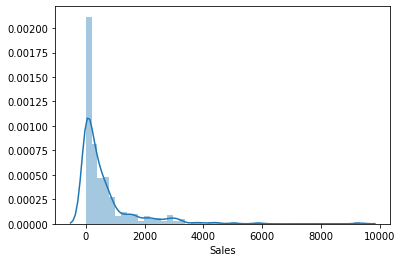

In [349]:
sns.distplot(final_data['Sales'])

In [433]:
final_data.head()

,Unnamed: 0,Sales,y_pred,SKU_Customer,Year,Month_No,MAD,MAPE
0,198,908.00,1355.940948,ALL OTHERS - US62338-91101,2018,10,0.330354,0.493327
1,200,884.00,1307.660955,ALL OTHERS - US62338-91101,2018,11,0.323984,0.479254
2,204,1433.40,1344.623901,ALL OTHERS - US62338-91101,2018,12,0.066023,0.061934
3,209,971.75,1327.359232,ALL OTHERS - US62338-91101,2019,1,0.267907,0.365947
4,213,1041.75,1335.907865,ALL OTHERS - US62338-91101,2019,2,0.220193,0.282369


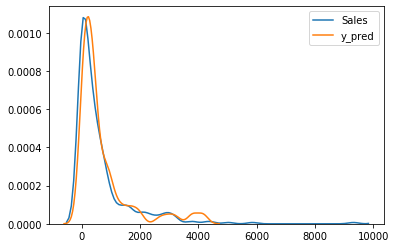

In [350]:
sns.kdeplot(final_data['Sales'])
sns.kdeplot(final_data['y_pred'])

In [359]:
final_data[final_data['Sales']>2000].MAD.mean()
final_data[final_data['Sales']<2000].MAD.mean()

0.6068816887333172

In [434]:
print(final_data[final_data['Sales']>1000].MAPE.mean())
print(final_data[final_data['Sales']<1000].MAPE.mean())

0.2772333413003364
2.805362811434578


In [368]:
final_data[final_data['Sales']>1000]

,Sales,y_pred,SKU_Customer,Year,Month_No,MAD,MAPE
204,1433.40,1344.623901,ALL OTHERS - US62338-91101,2018,12,0.066023,0.061934
213,1041.75,1335.907865,ALL OTHERS - US62338-91101,2019,2,0.220193,0.282369
217,1023.80,1372.870812,ALL OTHERS - US62338-91101,2019,3,0.254263,0.340956
512,1648.50,1720.691652,ALL OTHERS - US62338-92944,2018,10,0.041955,0.043792
514,1587.50,1672.411659,ALL OTHERS - US62338-92944,2018,11,0.050772,0.053488
518,1372.00,1709.374605,ALL OTHERS - US62338-92944,2018,12,0.197367,0.245900
523,1527.75,1692.109936,ALL OTHERS - US62338-92944,2019,1,0.097133,0.107583
527,1004.25,1700.658569,ALL OTHERS - US62338-92944,2019,2,0.409493,0.693461
531,1280.60,1737.621515,ALL OTHERS - US62338-92944,2019,3,0.263016,0.356881
845,1980.80,433.093859,ALL OTHERS - US62338-99058,2019,3,3.573604,0.781354


In [ ]:
final_data = final_data.sort_values(by='Sales')

In [ ]:
final_data['Sales_perc'] = round(100*final_data.Sales.cumsum(axis = 0) /final_data.Sales.sum(),2)

In [ ]:
test2 = test.copy()
test2['y_pred'] = np.array(gbm.predict(X_test_scaled))
test2['Customer_SKU'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']
test2['y_pred'] = np.array(test2.groupby(['Customer_SKU', 'Year', 'Month_No', ]).y_pred.transform('sum'))

final_data = test2[['Sales', 'y_pred', 'Customer_SKU', 'Year', 'Month_No']]
final_data = final_data.drop_duplicates()


final_data['MAD'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] == 0)&(final_data['Sales']!=0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['y_pred']))
 
final_data['MAPE'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] != 0)&(final_data['Sales']==0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['Sales']))

    
print(final_data['MAD'].mean())   
print(final_data['MAPE'].mean())     
print(rmse_by_month(final_data['Sales'], final_data['y_pred']))  

In [ ]:
test2 = test.copy()
test2['y_pred'] = np.array(ridge_cv.predict(X_test_scaled))
test2['SKU_Customer'] = test2.merge(data_labels, left_index=True, right_index=True)['SKU_Customer']

final_data = test2[['Sales', 'y_pred', 'SKU_Customer', 'Year', 'Month_No']]
final_data = final_data.drop_duplicates()


final_data['MAD'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] == 0)&(final_data['Sales']!=0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['y_pred']))
 
final_data['MAPE'] = np.where((final_data['y_pred'] == 0)&(final_data['Sales'] == 0), 0, \
                           np.where((final_data['y_pred'] != 0)&(final_data['Sales']==0),1, np.abs(final_data['y_pred']-final_data['Sales'])/final_data['Sales']))

    
print(final_data['MAD'].mean())   
print(final_data['MAPE'].mean())     
print(rmse_by_month(final_data['Sales'], final_data['y_pred']) )   